### Business Objective 

* ####  To approve the loan applications of the clients who appear to be highly likely capable of repaying the loans.
* ####  In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.
* ####  Identifying the patterns which indicate if a client has difficulty paying their installments, to take different actions like denying the loan, reducing loan amount, lending at higher interest rates to risky clients.



#### *Kindly note, no charts or any output would be visible before successfully installing the ipywidgets,every output will show error without the installation.*

In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20,10]
import seaborn as sns
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(10,8)})
pd.set_option('display.max_rows', 350)
pd.set_option('display.max_columns', 350)
pd.set_option('display.max_colwidth', -1)

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#### Import the data

In [3]:
# reading the csv files
appdf=pd.read_csv("application_data.csv")
prevdf=pd.read_csv("previous_application.csv")
coldes=pd.read_csv("columns_description.csv", encoding="ANSI") # the column description file

In [4]:
prevdf.shape

(1670214, 37)

In [5]:
#separtely creating dataframes for column description of both application and previous application dataframe.
appcoldes=coldes.iloc[:122,2:4].set_index("Row").rename({"Description": "Application Data Feature Description"}, axis='columns')
prevcoldes=coldes.iloc[123:,2:4].set_index("Row").rename({"Description": "Previous Application Data Feature Description"}, axis='columns')

### Step 1. Data Cleaning


In [7]:
#function for missing values in columns
def missing_coldata(df):
    missing_d = pd.DataFrame(round(df.isnull().sum().sort_values(ascending=False)/len(df.index)*100), columns=['% of missing value'])
    missing_d['Count of Missing Values'] = df.isnull().sum()
    return missing_d

In [8]:
#function for missing values in rows
def missing_rowdata(df):
    missing_d = pd.DataFrame(round(df.isnull().sum(axis=1).sort_values(ascending=False)/len(df.columns)*100), columns=['% of missing value'])
    missing_d['Count of Missing Values'] = df.isnull().sum(axis=1)
    return missing_d

#### 1.1  APPLICATION DATASET - appdf- Missing data check for columns:

missing_coldata(appdf)

##### Notice that there are columns having almost 53%, 59%, 68%, 70% etc. missing values. When dealing with columns, you have two simple choices - either **delete or retain the column.** If we retain the column, we'll have to treat (i.e. delete or impute) the rows having missing values.

* #### If we delete the missing rows, we lose data. If we impute, we introduce bias, So we need to check if we can delete those columns having very high missing values.


#### Here we want to find the correlation of Target variable with other variables to find which variables are the most useful to impact the decision of approving the applicants 




* #### There are others such as like are of apartment and many such variables which although seem slighlty important, have upto 70% missing values. 

#### It is impossible to either delete or impute the rows corresponding to such large number of missing values without losing a lot of data or introducing heavy bias. 



#### for any analysis of these columns create a new dataframe app_df_nan_var with all columns having more than 50% missing values and SK_ID_CURR and TARGET


app_df_nan_var=pd.concat([appdf.loc[:,["SK_ID_CURR","TARGET"]],appdf.loc[:,appdf.isnull().sum() > len(appdf.index)*0.50]],axis=1)
app_df_nan_var.head()

#### There is a seperate df for >50% missing value columns, now retaining only those columns from appdf less than 50 percent missing  values 

In [11]:
appdf= appdf.loc[:,appdf.isnull().sum() < len(appdf.index)*0.50]

In [12]:
# finding the percentage of missing values in each column of appdf which is new dataframe formed from appdf after dropping columns having more than 50% missing values
missing_coldata(appdf)

,% of missing value,Count of Missing Values
FLOORSMAX_AVG,50.0,153020
FLOORSMAX_MEDI,50.0,153020
FLOORSMAX_MODE,50.0,153020
YEARS_BEGINEXPLUATATION_AVG,49.0,150007
YEARS_BEGINEXPLUATATION_MEDI,49.0,150007
YEARS_BEGINEXPLUATATION_MODE,49.0,150007
TOTALAREA_MODE,48.0,148431
EMERGENCYSTATE_MODE,47.0,145755
OCCUPATION_TYPE,31.0,96391
EXT_SOURCE_3,20.0,60965


#### The missing values above 30 % in appdf columns after dropping 50% above missing data are as follows:
* ##### FLOORSMAX_MEDI                  50.0
* ##### FLOORSMAX_MODE                  50.0
* ##### FLOORSMAX_AVG                   50.0
* ##### YEARS_BEGINEXPLUATATION_MEDI    49.0
* ##### YEARS_BEGINEXPLUATATION_MODE    49.0
* ##### YEARS_BEGINEXPLUATATION_AVG     49.0
* ##### TOTALAREA_MODE                  48.0
* ##### EMERGENCYSTATE_MODE             47.0
* ##### OCCUPATION_TYPE                 31.0
#### All these columns with more than 30% missing values except 'OCCUPATION_TYPE' can also be concatenated with app_df_nan_var and dropped from appdf

In [13]:
# adding dcols to app_df_nan_var with more than 47% as they are not looking very important for analysis as of now, EXCEPT "OCCUPATION_TYPE"
dcols=["FLOORSMAX_MEDI", "FLOORSMAX_MODE", "FLOORSMAX_AVG","YEARS_BEGINEXPLUATATION_MEDI", "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BEGINEXPLUATATION_AVG", "TOTALAREA_MODE", "EMERGENCYSTATE_MODE"]
app_df_nan_var=pd.concat([app_df_nan_var,appdf.loc[:,dcols]],axis=1)

In [14]:
appdf.drop(dcols, axis=1,inplace=True) 

In [15]:
missing_coldata(appdf).T

,OCCUPATION_TYPE,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_QRT,NAME_TYPE_SUITE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,NAME_INCOME_TYPE,FLAG_OWN_REALTY,TARGET,FLAG_EMAIL,FLAG_PHONE,FLAG_CONT_MOBILE,NAME_CONTRACT_TYPE,FLAG_WORK_PHONE,FLAG_EMP_PHONE,FLAG_MOBIL,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,NAME_EDUCATION_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_RATING_CLIENT,NAME_HOUSING_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,REG_CITY_NOT_LIVE_CITY,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,FLAG_DOCUMENT_21,FLAG_DOCUMENT_20,FLAG_DOCUMENT_19,FLAG_DOCUMENT_18,FLAG_DOCUMENT_17,FLAG_DOCUMENT_16,FLAG_DOCUMENT_15,FLAG_DOCUMENT_14,FLAG_DOCUMENT_13,FLAG_DOCUMENT_12,FLAG_DOCUMENT_11,FLAG_DOCUMENT_10,FLAG_DOCUMENT_9,FLAG_DOCUMENT_8,FLAG_DOCUMENT_7,FLAG_DOCUMENT_6,FLAG_DOCUMENT_5,FLAG_DOCUMENT_4,FLAG_DOCUMENT_3,FLAG_DOCUMENT_2,ORGANIZATION_TYPE,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,HOUR_APPR_PROCESS_START,SK_ID_CURR
% of missing value,31.0,20.0,14.0,14.0,14.0,14.0,14.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Count of Missing Values,96391.0,60965.0,41519.0,41519.0,41519.0,41519.0,41519.0,41519.0,1292.0,1021.0,1021.0,1021.0,1021.0,660.0,278.0,12.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
#All the remaining 73 columns  with 8 columns having 14% to 31% missing values we are keeping without any imputation because these values can't be imputed with any significant data like mean , median or mode 
appdf.shape

(307511, 73)

#### 1.2. APPLICATION DATASET - appdf - Missing data check for rows

* ##### TO CHECK THE CHANGE IN THE MISSING DATA PERCENTAGE IN EACH ROW AFTER DROPPING THE COLUMNS, LETS CHECK THE APPDF

In [17]:
missing_rowdata(appdf).T

,133770,224890,265311,251669,28438,172595,185886,166882,45999,86825,298320,223447,50047,233257,228602,244833,215458,266184,10249,50536,166989,70599,38909,269492,150206,180761,65505,154164,80140,273411,135738,190338,127722,195755,92687,116937,168429,139622,117371,269786,3410,54457,102993,27190,271341,138913,53550,12087,3066,17133,221049,69707,258474,100873,12739,204445,53941,185713,213722,85541,21579,106362,160063,176951,197736,88255,301197,213503,187017,250565,87399,130610,28769,159316,394,303106,266465,41051,7077,203503,100425,95899,195931,305526,290495,273757,154667,299853,3498,256958,123452,31014,45043,168835,214476,195793,50104,32666,112029,168422,187850,72552,24200,276905,256996,85808,109165,279200,127942,286217,261487,203241,64818,148549,305642,20941,303509,198111,68013,265842,161293,253484,288550,139552,292548,177876,74199,89810,21734,48839,107825,115346,62345,252473,219410,272215,36899,228735,263760,18244,61205,63325,69278,62176,252924,136643,109581,304677,260125,80085,33103,193598,108424,39841,101089,254388,272355,201306,146561,116520,241006,293103,95615,128642,7986,148096,45634,299727,260963,14034,119592,249616,36250,26398,247473,...,175034,175033,175032,175030,175028,175010,175027,175024,175020,175019,175018,175017,175015,175014,175013,175011,174962,174959,175250,174958,174900,174899,174898,174897,174896,174895,174894,174888,174886,174885,174883,174880,174878,174873,174870,174869,174867,174864,174858,174856,174855,174854,174852,174902,174908,174909,174937,174955,174954,174953,174951,174950,174948,174946,174944,174942,174940,174936,174912,174935,174934,174932,174931,174930,174925,174922,174918,174917,174913,175049,175051,175052,175054,175200,175199,175198,175196,175194,175191,175190,175187,175180,175178,175177,175175,175174,175173,175170,175169,175168,175167,175166,175165,175163,175162,175161,175201,175204,175205,175228,175249,175248,175246,175245,175244,175241,175240,175235,175233,175231,175226,175206,175225,175224,175223,175219,175217,175216,175214,175213,175209,175208,175159,175158,175157,175079,175093,175091,175090,175089,175087,175086,175084,175083,175081,175080,175078,175096,175077,175076,175072,175070,175069,175068,175066,175064,175061,175055,175095,175098,175156,175125,175154,175152,175148,175142,175139,175138,175136,175134,175132,175126,175123,175101,175121,175120,175119,175116,175112,175111,175108,175106,175105,175102,0
% of missing value,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,15.0,14.0,14.0,14.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Count of Missing Val

In [18]:
# checking for >= 50% missing values out of total 122 values in each row og APPLICATION DATASET
@interact
def mis_val_rowperc(x=(1,70,1)):
    return print("{}% rows have >={} missing values out of 307511 rows in appdf,hence we check after dropping columns, what percentage of missing values are left in appdf"
                 .format(round(100*(len(appdf[appdf.isnull().sum(axis=1)>=x].index) / len(appdf.index)),2),x))

interactive(children=(IntSlider(value=35, description='x', max=70, min=1), Output()), _dom_classes=('widget-in…

  *appdf- Percentage of rows having around 50% missing values i.e. approx 60 missing out of total 120 are 0.01% rows and approx 50 missing values, it is 7.65%*

In [19]:
# calculate the percentage of the rows having  missing values out of 307511 rows in appdf
@interact
def mis_val_rowperc(x=(0,13,1)):
    return print("{}% rows have >={} missing values out of 307511 rows in APPLICATION DATASET, appdf".format(round(100*(len(appdf[appdf.isnull().sum(axis=1)>=x].index) / len(appdf.index)),2),x))

interactive(children=(IntSlider(value=6, description='x', max=13), Output()), _dom_classes=('widget-interact',…

#### #appdf- now only 0.02% rows have upto 12 missing values, compared to 60 missing values in appdf in 0.01% rows


* ##### appdf 307511 datapoints(rows) and 73 features(columns) with not more than 13% and 31 % missing values across rows and columns respectively.

#### 1.3. PREVIOUS APPLICATION DATASET - prevdf - Missing data check for rows

In [20]:
#missing values in each column of prevdf
missing_rowdata(prevdf).T

,402355,545870,24543,205845,366790,242081,1632777,637970,1347853,1586658,1372852,498410,1328920,1307918,348152,1182555,408061,1663138,220988,1356110,441053,1646484,1490295,1197734,1593796,719104,442262,1493695,384713,1642495,692562,1026512,1331614,880883,994419,326399,206049,1550328,827051,1553412,39305,1553416,24574,803178,679234,812051,557215,117368,465279,1070243,413701,372481,1248443,705976,362373,308819,565757,565758,1030804,531999,1590504,362217,778611,122153,748189,778538,845120,141381,1182445,1299527,1556279,1471299,1022725,1522490,39461,1440124,1515304,344998,1036189,238742,453125,1548417,742799,1306138,175815,990084,364033,762593,613941,408227,17038,61664,537345,1590627,880741,1407445,239872,579835,80232,1145918,942291,632936,406626,1373292,1199948,808740,150224,937628,1136219,1338533,535228,1430704,774119,280708,607688,929343,1570752,325429,802941,1566792,145615,793634,170943,1222485,1017597,510246,991603,169393,779030,426642,783188,561669,1201519,139320,463357,359896,636537,614338,1409305,1221754,818749,613129,948907,1226037,947123,1072127,1119018,1481269,1426983,1550456,1037011,1079236,1240857,108822,248395,317522,973444,264807,1128038,351786,948737,193014,1657486,873222,557633,1455329,309636,1099184,470584,1056601,1047571,168273,813924,532457,1555858,...,1291161,1101911,1101916,253220,716831,164934,561339,815986,1290229,322329,1101159,476684,1371664,1476017,476623,1100984,1534170,25919,1290839,253177,717707,1290646,253156,717639,816375,1638046,1475840,717589,165181,476770,165037,1638027,322848,1534138,1290496,26085,322952,1001550,1290268,1290915,1100871,1637578,165605,1289345,1535113,475249,475282,1000363,562908,321956,1371231,475314,1475153,1638441,252417,1288833,475336,475337,1475476,1535163,1372458,1288898,166001,1637139,716029,1475029,252249,321908,26927,1638511,165936,114850,321945,1288435,1000137,26888,114888,475388,1535047,1638429,1476262,1372145,26514,817285,165633,1476196,1100668,562557,1289202,562598,1289120,1638377,1534920,1637511,1535001,1102159,322136,477174,1372347,1000552,718261,816213,716628,115150,1033197,1644524,295160,937855,343517,1267368,1360498,1266160,1099843,465389,681472,963828,21366,472706,927154,242152,1194245,1102937,1619458,1034600,432198,1451505,24027,1294636,1064627,1401857,558417,1272655,1513702,388239,115115,1087911,634564,319130,1110220,129312,1553731,1056301,1603346,1603271,975315,663452,43927,1409987,873294,1320640,1262040,1290702,1452129,514206,463934,1663414,1645311,266294,1433325,1293704,234060,1512900,598,1500801,1428970,209699,446467,812972,1116642,1098239,394190,1223920,568426,376643,1462707
% of missing value,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,41.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

* #### Tha maximum number of missing values in a row is 15 in prevdf
 ##### - Only 0.02 % rows have 15 missing values
* ##### We do not drop any rows on this basis and thus check the columns to treat missing data

#### 1.4.  PREVIOUS APPLICATION DATASET - prevdf- Missing data check for columns:

In [21]:
# summing up the missing values (column-wise) in prevdf
missing_coldata(prevdf).T

,RATE_INTEREST_PRIVILEGED,RATE_INTEREST_PRIMARY,RATE_DOWN_PAYMENT,AMT_DOWN_PAYMENT,NAME_TYPE_SUITE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,PRODUCT_COMBINATION,AMT_CREDIT,SK_ID_CURR,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,AMT_APPLICATION,NAME_PAYMENT_TYPE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,SK_ID_PREV
% of missing value,100.0,100.0,54.0,54.0,49.0,40.0,40.0,40.0,40.0,40.0,40.0,23.0,22.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Count of Missing Values,1664263.0,1664263.0,895844.0,895844.0,820405.0,673065.0,673065.0,673065.0,673065.0,673065.0,673065.0,385515.0,372235.0,372230.0,346.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* #### We can see that there are a few columns having 22,40,54,and approx 100% missing values. But all these are important columns for analysis and need to be analysed before treating further.

In [22]:
# these have approx 100% missing values, hence anlysing the remaining non null values
prevdf[["RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED"]].notnull().sum()

RATE_INTEREST_PRIMARY       5951
RATE_INTEREST_PRIVILEGED    5951
dtype: int64

 ##### #Create a dataframe where RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED" will have only the not null values with all other corresponding variable values of A NEW MERGED datarame of appdf and prevdf

In [23]:
##### Joining the two datasets appdf and prevdf 
prev_app_df=prevdf.join(appdf.set_index("SK_ID_CURR"), on='SK_ID_CURR', how="outer", lsuffix="_PREV", rsuffix="_CURR")

In [24]:
# the 100 percent missing value columns can be analysed seperately for those particular records for which they are not null
ratedf=prev_app_df[(prev_app_df["RATE_INTEREST_PRIVILEGED"]).notnull()]
ratedf.shape

(5951, 109)

In [25]:
ratedf['TARGET'].isnull().sum()

1160

In [26]:
ratedf=ratedf[(ratedf["TARGET"]).notnull()]
ratedf["TARGET"]=ratedf["TARGET"].astype(int)

In [27]:
# creating two df for target 1 and 0
rate_target0=ratedf[ratedf["TARGET"]==0]
rate_target1=ratedf[ratedf["TARGET"]==1]

In [28]:
# As we have seperately created a dataframe for "RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED" 
#which are approx 100% null value columns, we can now safely drop these columns from prev_app_df and prevdf
prev_app_df.drop(["RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED"],axis=1,inplace=True)
prevdf.drop(["RATE_INTEREST_PRIMARY", "RATE_INTEREST_PRIVILEGED"],axis=1,inplace=True)

Now as the data has been merged , checking missing values in the merged data prev_app_df

In [29]:
missing_coldata(prev_app_df)

,% of missing value,Count of Missing Values
AMT_DOWN_PAYMENT,54.0,912298
RATE_DOWN_PAYMENT,54.0,912298
NAME_TYPE_SUITE_PREV,50.0,836859
OCCUPATION_TYPE,43.0,719244
DAYS_LAST_DUE,41.0,689519
DAYS_FIRST_DRAWING,41.0,689519
NFLAG_INSURED_ON_APPROVAL,41.0,689519
DAYS_TERMINATION,41.0,689519
DAYS_LAST_DUE_1ST_VERSION,41.0,689519
DAYS_FIRST_DUE,41.0,689519


#### These columns can not be straight away dropped because these are carrying some important information 
##### - check further how to treat these missing values.

In [30]:
## analysing a dataframe with only the null values in it of columns having more than 50% missing data to understand if they can be imputed
prev_app_df.loc[:,prev_app_df.isnull().sum() > len(prev_app_df.index)*0.30].head(10)

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,NAME_TYPE_SUITE_PREV,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,OCCUPATION_TYPE
0,0.0,0.000000,NaN,365243.0,-42.0,300.0,-42.0,-37.0,0.0,NaN
735737,180000.0,0.101325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1567518,0.0,0.000000,NaN,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,NaN
1,NaN,NaN,Unaccompanied,365243.0,-134.0,916.0,365243.0,365243.0,1.0,Private service staff
335841,NaN,NaN,NaN,365243.0,-485.0,565.0,-155.0,-147.0,1.0,Private service staff
588441,24750.0,0.556485,Family,365243.0,-588.0,-438.0,-588.0,-580.0,0.0,Private service staff
617224,0.0,0.000000,Unaccompanied,365243.0,-1176.0,-846.0,-846.0,-840.0,0.0,Private service staff
692217,NaN,NaN,NaN,-713.0,-673.0,365243.0,-461.0,-61.0,0.0,Private service staff
1380202,0.0,0.000000,Unaccompanied,365243.0,-783.0,-693.0,-753.0,-748.0,0.0,Private service staff
2,NaN,NaN,"Spouse, partner",365243.0,-271.0,59.0,365243.0,365243.0,1.0,Core staff


##### *as we can see that none of these columns cant be IMPUTED by any mean, median or mode or any other data to replace missing values beacuse these contains varied values, Hence we keep them as it is.*

In [31]:
# checking total percentage of rows having missing data in prev_app_df
@interact
def mis_val_rowperc(x=(1,95,1)):
    return print("{}% rows have more than {} missing values out of 1670214 rows in merged application and previous application data, prev_app_df"
                 .format(round(100*(len(prev_app_df[prev_app_df.isnull().sum(axis=1)>=x].index) / len(prev_app_df.index)),2),x))

interactive(children=(IntSlider(value=48, description='x', max=95, min=1), Output()), _dom_classes=('widget-in…

##### the merged dataset after dropping missing value columns with 100 % missing data is prev_app_df
* #### the maximum number of missing values in a row is 37%  
* #### the maximum number of missing values in a column is 54%


#### #checking duplicates if any

In [32]:
dupcheck=prev_app_df[prev_app_df.duplicated()]
dupcheck

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_PREV,WEEKDAY_APPR_PROCESS_START_PREV,HOUR_APPR_PROCESS_START_PREV,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_PREV,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_CURR,AMT_ANNUITY_CURR,AMT_GOODS_PRICE_CURR,NAME_TYPE_SUITE_CURR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_CURR,HOUR_APPR_PROCESS_START_CURR,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [33]:
duplicateRowsDF = prev_app_df[prev_app_df.duplicated(["SK_ID_PREV"])].head(3)
duplicateRowsDF
# this shows that there are current applicants which did not have any previous applications recorded

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_PREV,WEEKDAY_APPR_PROCESS_START_PREV,HOUR_APPR_PROCESS_START_PREV,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_PREV,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_CURR,AMT_ANNUITY_CURR,AMT_GOODS_PRICE_CURR,NAME_TYPE_SUITE_CURR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_CURR,HOUR_APPR_PROCESS_START_CURR,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1670213,NaN,100031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Cash loans,F,N,Y,0.0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724.0,-2628.0,-6573.0,-1827.0,1.0,1.0,0.0,1.0,0.0,0.0,Cooking staff,1.0,3.0,2.0,MONDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,-161.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
1670213,NaN,100058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Revolving loans,F,N,Y,0.0,54000.0,135000.0,6750.0,135000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.014520,-12406.0,-1176.0,-1149.0,-2576.0,1.0,1.0,0.0,0.0,0.0,0.0,Core staff,2.0,2.0,2.0,THURSDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.450850,0.479449,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1670213,NaN,100076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Cash loans,M,Y,N,0.0,180000.0,315000.0,9679.5,315000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.028663,-13866.0,-2546.0,-5448.0,-4097.0,1.0,1.0,0.0,1.0,0.0,0.0,Drivers,2.0,2.0,2.0,MONDAY,12.0,0.0,0.0,0.0,0.0,0.0,0.0,Transport: type 3,0.584887,0.095070,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### A quick check on duplicate values, any ID present in appdf which has Nan in SK_ID_PREV in prev_app_df should also be unavailable in prevdf

In [34]:
prev_app_df[prev_app_df["SK_ID_CURR"].isin(['100031','100058',"100076"])]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_PREV,WEEKDAY_APPR_PROCESS_START_PREV,HOUR_APPR_PROCESS_START_PREV,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_PREV,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET,NAME_CONTRACT_TYPE_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_CURR,AMT_ANNUITY_CURR,AMT_GOODS_PRICE_CURR,NAME_TYPE_SUITE_CURR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_CURR,HOUR_APPR_PROCESS_START_CURR,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1670213,NaN,100031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Cash loans,F,N,Y,0.0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724.0,-2628.0,-6573.0,-1827.0,1.0,1.0,0.0,1.0,0.0,0.0,Cooking staff,1.0,3.0,2.0,MONDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,-161.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
1670213,NaN,100058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Revolving loans,F,N,Y,0.0,54000.0,135000.0,6750.0,135000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.014520,-12406.0,-1176.0,-1149.0,-2576.0,1.0,1.0,0.0,0.0,0.0,0.0,Core staff,2.0,2.0,2.0,THURSDAY,9.0,0.0,0.0,0.0,0.0,0.0,0.0,School,0.450850,0.479449,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1670213,NaN,100076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Cash loans,M,Y,N,0.0,180000.0,315000.0,9679.5,315000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.028663,-13866.0,-2546.0,-5448.0,-4097.0,1.0,1.0,0.0,1.0,0.0,0.0,Drivers,2.0,2.0,2.0,MONDAY,12.0,0.0,0.0,0.0,0.0,0.0,0.0,Transport: type 3,0.584887,0.095070,0.0,0.0,0.0,0.0,-3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
appdf[appdf["SK_ID_CURR"].isin(['100031','100058',"100076"])]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,-161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
50,100058,0,Revolving loans,F,N,Y,0,54000.0,135000.0,6750.0,135000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.014520,-12406,-1176,-1149.0,-2576,1,1,0,0,0,0,Core staff,2.0,2,2,THURSDAY,9,0,0,0,0,0,0,School,0.450850,0.479449,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
64,100076,0,Cash loans,M,Y,N,0,180000.0,315000.0,9679.5,315000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.028663,-13866,-2546,-5448.0,-4097,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,12,0,0,0,0,0,0,Transport: type 3,0.584887,0.095070,0.0,0.0,0.0,0.0,-3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
prevdf[prevdf["SK_ID_CURR"].isin(['100031','100058',"100076"])]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL


Hence there is no discrepency in the data in prev_app_df

In [37]:
print(prevdf.shape,appdf.shape,prev_app_df.shape)

(1670214, 35) (307511, 73) (1686668, 107)


### Step 2. OUTLIER IDENTIFICATION AND HANDLING

In [38]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# NUMERIC
numappdf=appdf[list(appdf.select_dtypes(numerics).columns)]
numprevdf=prevdf[list(prevdf.select_dtypes(numerics).columns)]
num_prev_app=prev_app_df[list(prev_app_df.select_dtypes(numerics).columns)] 

# CATEGORICAL 
catappdf=appdf[list(appdf.select_dtypes(exclude=numerics).columns)]
catprevdf=prevdf[list(prevdf.select_dtypes(exclude=numerics).columns)] 
cat_prev_app=prev_app_df[list(prev_app_df.select_dtypes(exclude=numerics).columns)]

#### 2.1. APPLICATION DATASET - appdf - outlier check

C:\Users\NAVARCH\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))
C:\Users\NAVARCH\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


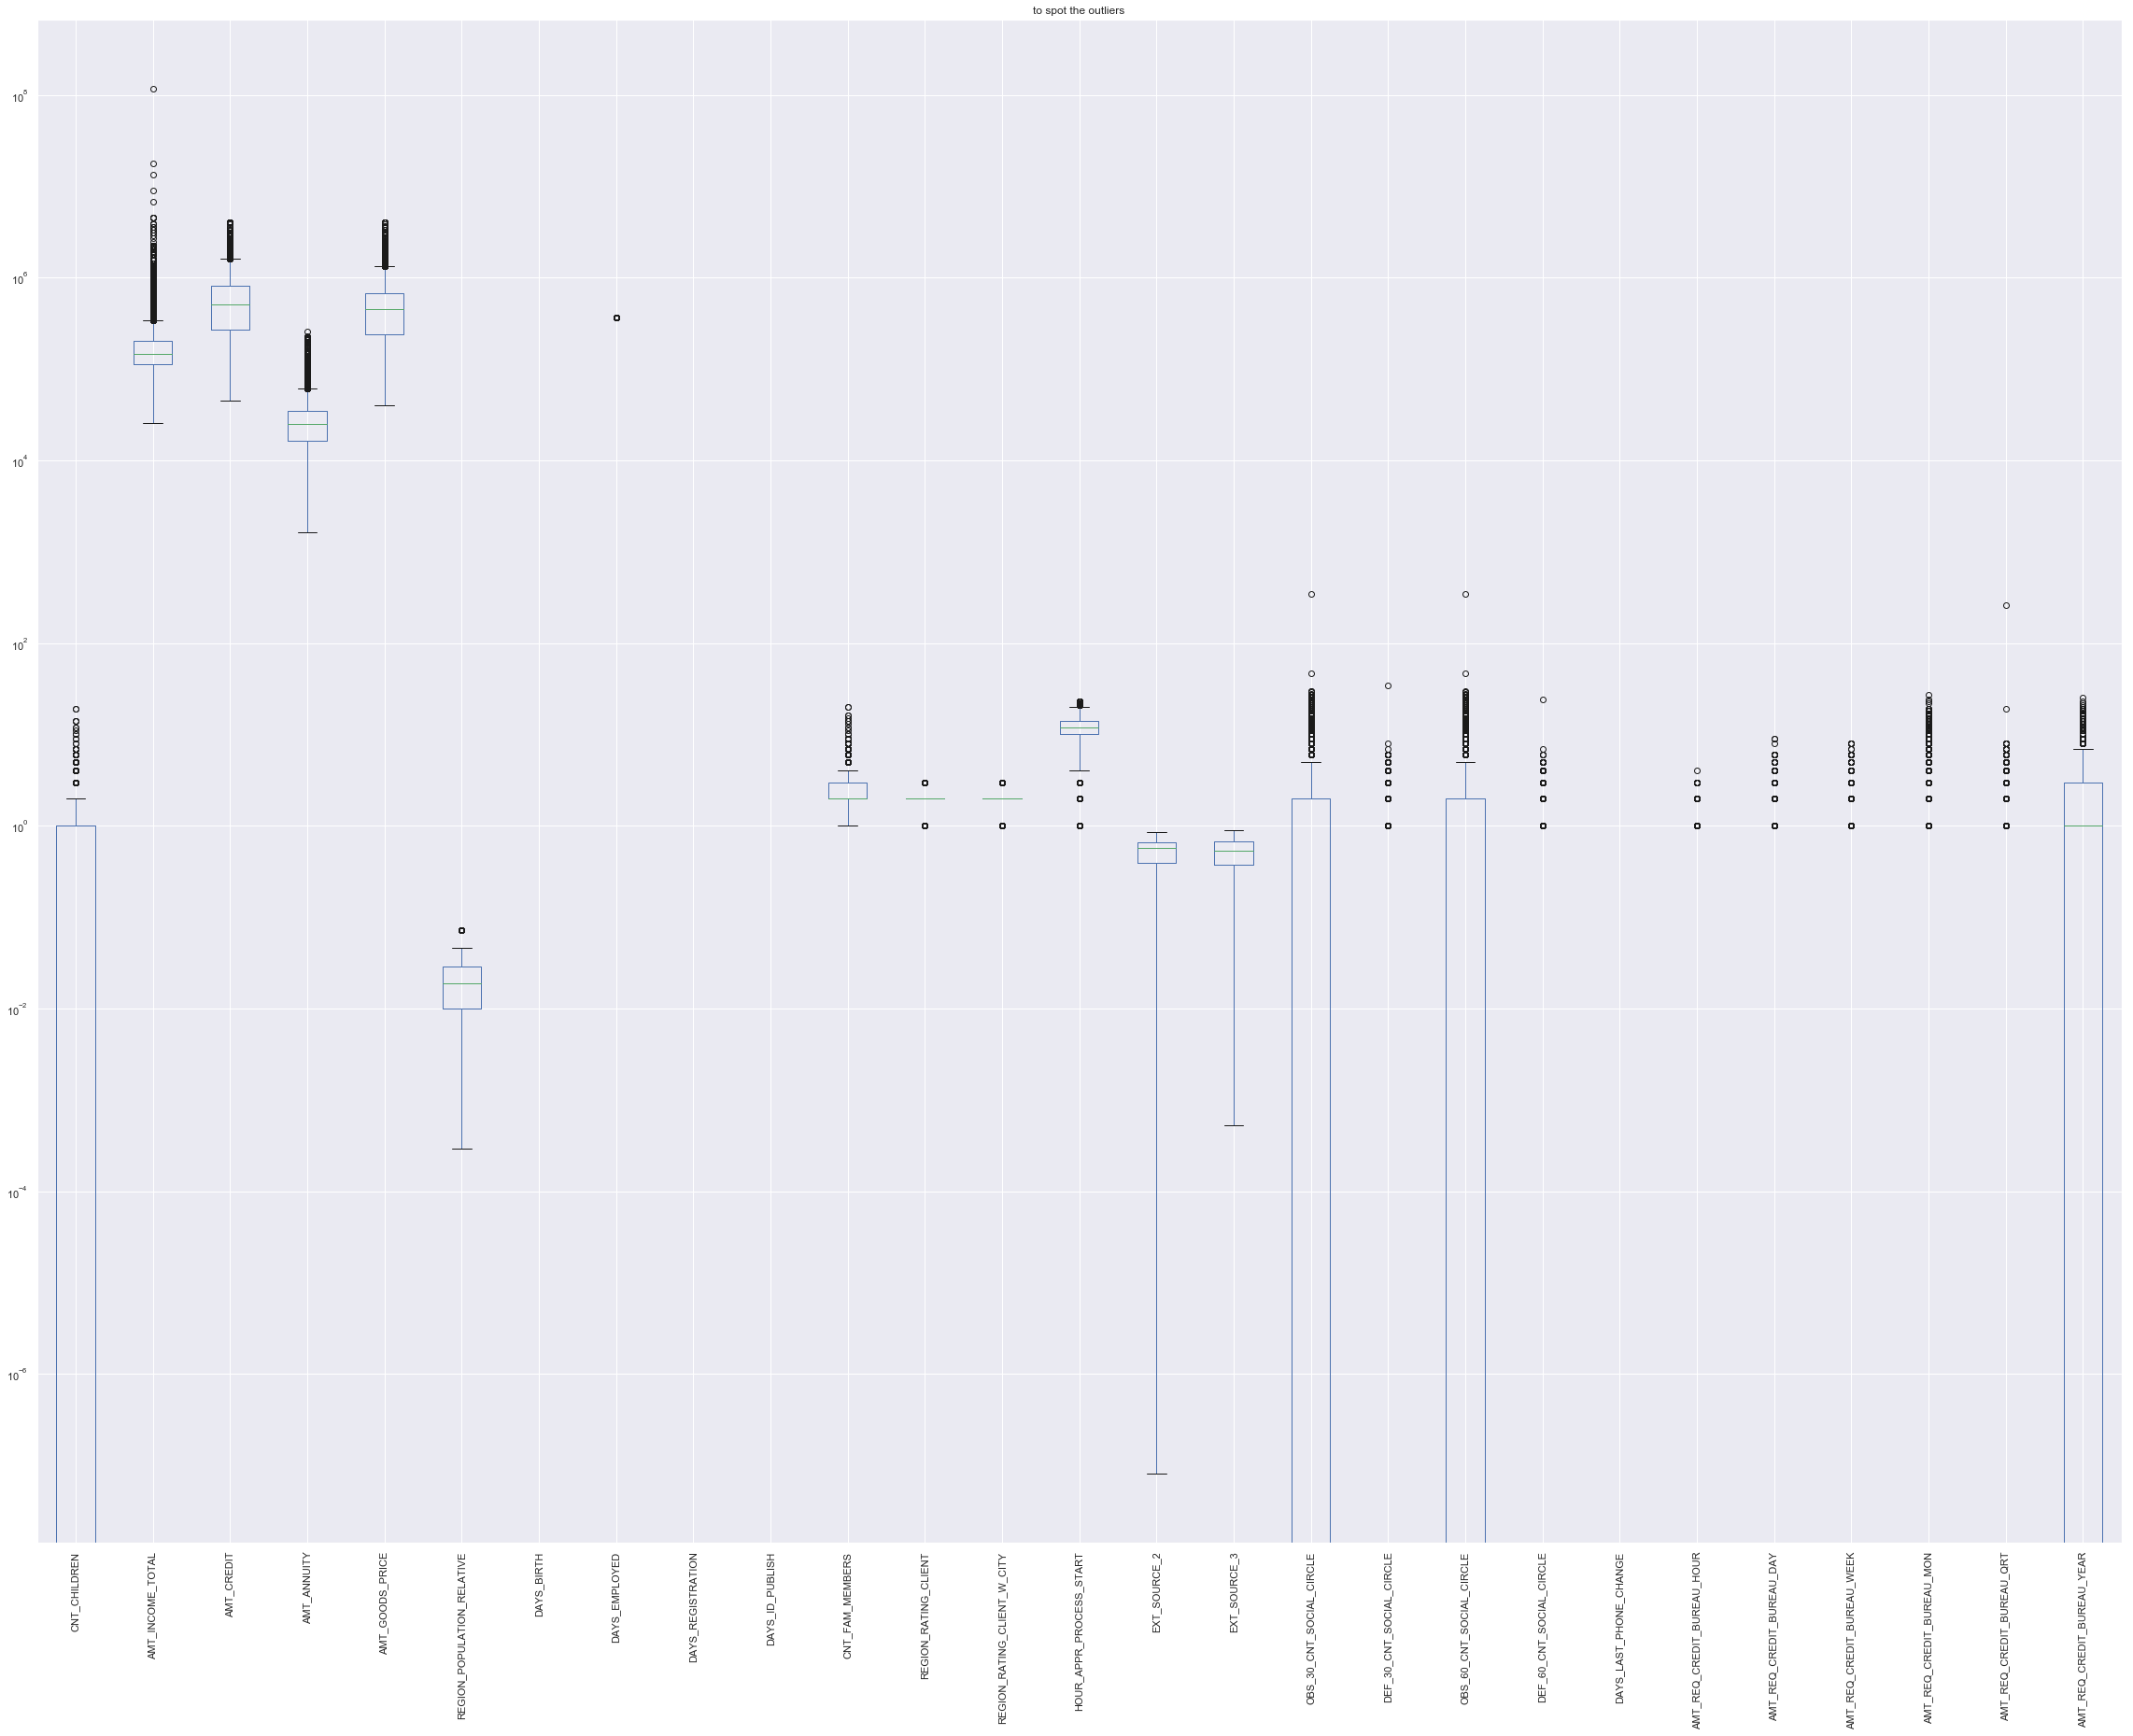

In [39]:
# to spot the outliers in CONTINUOUS numeric variables in the application dataset 
numappdf[['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION',
          'DAYS_ID_PUBLISH','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_HOUR',
          'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].plot(kind="box",figsize=[40,30], title="to spot the outliers", rot="vertical", logy=True)

In [40]:
numappdf.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000

In [41]:
# for a better view of outliers in each variable for presentation point of view
@interact
def outliers_count(x=numappdf.iloc[:,:1].columns, 
                 y=numappdf.iloc[:,2:].columns):
    return numappdf.plot(kind='box', x=x, y=y) 

interactive(children=(Dropdown(description='x', options=('SK_ID_CURR',), value='SK_ID_CURR'), Dropdown(descrip…

* To find the count of outliers we use the following aggregation

In [42]:
# the value count of all the numeric variables of application data
@interact
def grpby(grouppbycol=numappdf.iloc[:,1:].columns):
    return print("The number of records in this category:","\n", numappdf.groupby(grouppbycol).count()["SK_ID_CURR"])

interactive(children=(Dropdown(description='grouppbycol', options=('TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL…

We will now check details of all those outliers which are visible in each variable to find out if they have nay discrepency or they are significant for analysis

In [43]:
appdf[appdf['REGION_POPULATION_RELATIVE']<0.000533]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
248609,387633,0,Revolving loans,F,Y,Y,1,225000.0,585000.0,29250.0,585000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.00029,-9221,-703,-322.0,-1821,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,11,1,1,1,1,0,0,Industry: type 12,0.692250,0.420611,6.0,2.0,6.0,2.0,-1709.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
280258,424677,0,Revolving loans,F,N,Y,0,81000.0,225000.0,11250.0,180000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.00029,-21619,365243,-12605.0,-4720,1,0,0,1,0,0,NaN,2.0,2,2,SATURDAY,16,1,0,0,1,0,0,XNA,0.618899,0.707699,0.0,0.0,0.0,0.0,-484.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


* REGION_POPULATION_RELATIVE has two outliers with very low value compared to the rest of records, but they are not having payment difficulties, we can analyse the prevdf further but for now they remain in the application data

In [44]:
appdf[appdf['CNT_CHILDREN']>10]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
34545,140032,1,Cash loans,M,Y,N,11,315000.0,1007761.5,38515.5,927000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,-17308,-198,-3940.0,-844,1,1,0,1,0,0,Managers,13.0,2,2,FRIDAY,17,0,0,0,0,1,1,Other,0.567454,0.122955,0.0,0.0,0.0,0.0,-3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
80948,193853,0,Cash loans,F,N,Y,12,337500.0,746280.0,59094.0,675000.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.046220,-14093,-2710,-2066.0,-3908,1,1,0,1,0,0,Core staff,14.0,1,1,FRIDAY,13,0,0,0,0,0,0,Kindergarten,0.703253,0.132597,3.0,2.0,3.0,1.0,-357.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
155369,280108,0,Cash loans,F,N,Y,19,112500.0,269550.0,13891.5,225000.0,Family,Working,Secondary / secondary special,Single / not married,House / apartment,0.007020,-11057,-1853,-3096.0,-745,1,1,1,1,1,0,Waiters/barmen staff,20.0,2,2,SUNDAY,11,0,0,0,0,0,0,Restaurant,0.553968,NaN,1.0,1.0,1.0,1.0,-744.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
171125,298322,0,Revolving loans,F,N,Y,12,225000.0,202500.0,10125.0,202500.0,Family,Commercial associate,Secondary / secondary special,Married,House / apartment,0.046220,-13894,-2542,-1867.0,-3709,1,1,1,1,1,0,Core staff,14.0,1,1,TUESDAY,13,0,0,0,0,0,0,Kindergarten,0.732542,0.355639,3.0,2.0,3.0,1.0,-158.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
176011,303956,0,Cash loans,M,Y,Y,14,225000.0,1085058.0,55530.0,891000.0,Children,Working,Secondary / secondary special,Separated,House / apartment,0.031329,-17754,-1689,-7149.0,-1298,1,1,0,1,0,0,Drivers,15.0,2,2,FRIDAY,8,0,0,0,0,0,0,Self-employed,0.513617,0.259468,0.0,0.0,0.0,0.0,-1718.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
183878,313127,0,Cash loans,F,Y,N,14,45000.0,810000.0,23814.0,810000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.008625,-20308,365243,-12416.0,-3829,1,0,0,1,0,0,NaN,16.0,2,2,TUESDAY,14,0,0,0,1,0,0,XNA,0.730308,0.672243,1.0,0.0,1.0,0.0,-1785.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
265784,407877,0,Cash loans,F,N,Y,19,112500.0,135000.0,8788.5,135000.0,Unaccompanied,Working,Higher education,Single / not married,House / apartment,0.015221,-10297,-896,-4733.0,-2599,1,1,0,1,1,0,Core staff,20.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.167332,0.574447,1.0,0.0,1.0,0.0,-2495.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
267998,410527,0,Cash loans,F,N,N,14,54000.0,604152.0,25596.0,540000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.011703

* CNT_CHILDREN has 10 to 15 records higher than 10 count , there doesnt look like any discrepency and many of them are having organization type as kindergarten, and most of them are not defaulters.
. These outliers need not be removed from the data, as they could be potential repayers for future business,

In [45]:
# checking the varation in std dev due to outliers
appdf[appdf['AMT_INCOME_TOTAL']<13500000.0]['AMT_INCOME_TOTAL'].describe()

count    3.075080e+05
mean     1.683167e+05
std      1.011340e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      9.000000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

In [46]:
# details of outliers in appdf
appdf.loc[[12840, 203693,246858]].T

,12840,203693,246858
SK_ID_CURR,114967,336147,385674
TARGET,1,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Cash loans
CODE_GENDER,F,M,M
FLAG_OWN_CAR,N,Y,Y
FLAG_OWN_REALTY,Y,Y,Y
CNT_CHILDREN,1,2,0
AMT_INCOME_TOTAL,1.17e+08,1.80001e+07,1.35e+07
AMT_CREDIT,562491,675000,1.4005e+06
AMT_ANNUITY,26194.5,69295.5,130946


* the highest income recorded here is 117000000 which does not look authentic somehow, could be an error, because the Occupation type is Labourer and is also a defaulter.
*The next two highest income seem to be authentic but has a lot of Nan values hence dropping all these three outliers*
* AMT_INCOME_TOTAL has 3 outliers with income much higher(more than 13500000) than the rest of population
largest three values of "AMT_INCOME_TOTAL" are creating a huge variation in 75th and 100th quantile, the standard deviation also changes from 237123.1 to 101134.0  

In [47]:
#hence dropping these particular outliers
#appdf.drop([12840, 203693,246858],inplace=True)

In [48]:
appdf.filter(like="SOCIAL").columns

Index(['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'],
      dtype='object')

In [49]:
appdf[['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']].describe()

,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,306490.000000,306490.000000,306490.000000,306490.000000
mean,1.422245,0.143421,1.405292,0.100049
std,2.400989,0.446698,2.379803,0.362291
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000
max,348.000000,34.000000,344.000000,24.000000


In [50]:
appdf[['OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']].nlargest(columns=['OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE'],n=20)

,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
169517,30.0,30.0
280641,30.0,29.0
68096,27.0,27.0
90035,27.0,27.0
94870,27.0,27.0
114543,27.0,27.0
131200,27.0,27.0
289866,26.0,26.0
7159,25.0,25.0
44996,26.0,25.0


In [51]:
# SK_ID_CURR of the outlier of 'OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE'
appdf.loc[148403]

SK_ID_CURR                     272071              
TARGET                         0                   
NAME_CONTRACT_TYPE             Revolving loans     
CODE_GENDER                    M                   
FLAG_OWN_CAR                   N                   
FLAG_OWN_REALTY                Y                   
CNT_CHILDREN                   0                   
AMT_INCOME_TOTAL               202500              
AMT_CREDIT                     180000              
AMT_ANNUITY                    9000                
AMT_GOODS_PRICE                180000              
NAME_TYPE_SUITE                Family              
NAME_INCOME_TYPE               State servant       
NAME_EDUCATION_TYPE            Higher education    
NAME_FAMILY_STATUS             Single / not married
NAME_HOUSING_TYPE              House / apartment   
REGION_POPULATION_RELATIVE     0.020246            
DAYS_BIRTH                     -10111              
DAYS_EMPLOYED                  -1917               
DAYS_REGISTR

In [52]:
org_Type_police=appdf[appdf["ORGANIZATION_TYPE"]=='Police']
org_Type_police[['SK_ID_CURR',"TARGET",'OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE']]

,SK_ID_CURR,TARGET,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE
65,100077,0,4.0,4.0
341,100393,0,0.0,0.0
346,100398,0,9.0,9.0
351,100405,0,0.0,0.0
697,100806,0,0.0,0.0
705,100814,0,1.0,1.0
1046,101215,0,1.0,1.0
1180,101391,0,4.0,4.0
1518,101785,0,1.0,1.0
1614,101893,0,0.0,0.0


In [53]:
# It is better to drop this outlier, also it is not a defaulter.
appdf.drop([148403],inplace=True)

In [54]:
appdf['DAYS_EMPLOYED'].describe()

count    307510.000000
mean     63815.259660 
std      141275.946501
min     -17912.000000 
25%     -2760.000000  
50%     -1213.000000  
75%     -289.000000   
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [55]:
appdf['DAYS_EMPLOYED'].quantile(0.81)

-116.0

In [56]:
daysemp=appdf[appdf['DAYS_EMPLOYED']==365243]
print(daysemp[["SK_ID_CURR","TARGET"]].groupby("TARGET").count())
print(daysemp[["SK_ID_CURR","NAME_INCOME_TYPE"]])

        SK_ID_CURR
TARGET            
0       52384     
1       2990      
        SK_ID_CURR NAME_INCOME_TYPE
8       100011      Pensioner      
11      100015      Pensioner      
23      100027      Pensioner      
38      100045      Pensioner      
43      100050      Pensioner      
46      100053      Pensioner      
54      100062      Pensioner      
56      100064      Pensioner      
62      100073      Pensioner      
79      100094      Pensioner      
81      100096      Pensioner      
84      100099      Pensioner      
99      100118      Pensioner      
105     100124      Pensioner      
106     100125      Pensioner      
108     100127      Pensioner      
117     100137      Pensioner      
118     100138      Pensioner      
125     100146      Pensioner      
140     100162      Pensioner      
143     100165      Pensioner      
156     100183      Pensioner      
157     100185      Pensioner      
158     100186      Pensioner      
173     100202      Pens

*there are around 19% i.e. 55374 entries for 'DAYS_EMPLOYED'=365243 (income type is pension) out of which 2990 are defaulters*
-- all these values are completely different from the rest 81% data which lies between -17912 to -119

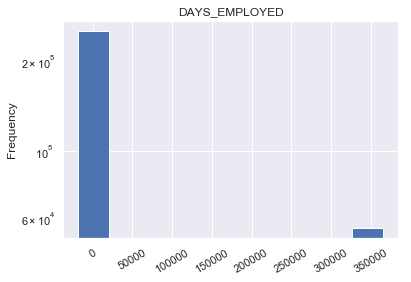

In [57]:
appdf['DAYS_EMPLOYED'].plot(kind="hist",title='DAYS_EMPLOYED', rot=30,logy=True)

It is a better solution to seperate the pensioners from the rest of the data and conduct their analysis seperately.

* #### *Noting that Analysis of pensioners can be done separately because they are already outliers*

#### 2.2. PREVIOUS APPLICATION DATASET - prevdf - outlier check

In [58]:
@interact
def scatter_plot(x=numprevdf.iloc[:,:1].columns, 
                 y=numprevdf.iloc[:,2:].columns):
    return  numprevdf.plot(kind='box', x=x, y=y, figsize=[5,5]) 

interactive(children=(Dropdown(description='x', options=('SK_ID_PREV',), value='SK_ID_PREV'), Dropdown(descrip…

In [59]:
# the value count of all the numeric variables of previous application data
@interact
def grpby(grouppbycol=numprevdf.iloc[:,1:].columns):
    return print("The number of records in this category:","\n", numprevdf.groupby(grouppbycol).count()["SK_ID_PREV"])

interactive(children=(Dropdown(description='grouppbycol', options=('SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATI…

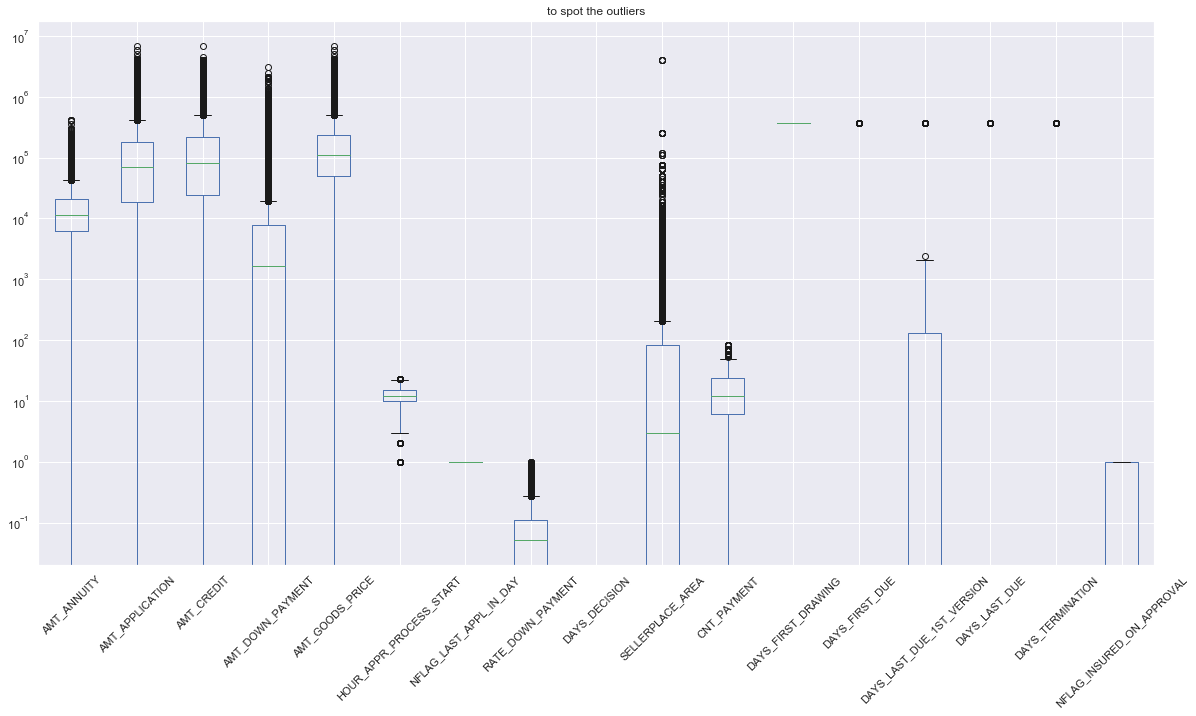

In [60]:
# as the first two columns are the ids of applications , hence skipping those columns and plotting the rest
numprevdf.iloc[:,2:].plot(kind="box",figsize=[20,10], title="to spot the outliers", rot=45, logy=True)

In [61]:
prevdf.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


There is max value as 365243 in, 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE' and 'DAYS_TERMINATION' where the remaining value are negative, which shows for a huge difference. 

In [62]:
prevdf[['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']].quantile(0.77)

DAYS_FIRST_DRAWING           365243.0
DAYS_FIRST_DUE              -379.0   
DAYS_LAST_DUE_1ST_VERSION    178.0   
DAYS_LAST_DUE               -36.0    
DAYS_TERMINATION            -8.0     
Name: 0.77, dtype: float64

In [63]:
due_outliers=prevdf[prevdf['DAYS_LAST_DUE']==365243]
due_outliers[["SK_ID_CURR","SK_ID_PREV",'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION']]

,SK_ID_CURR,SK_ID_PREV,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
1,108129,2802425,-134.0,916.0,365243.0,365243.0
2,122040,2523466,-271.0,59.0,365243.0,365243.0
17,142748,1285768,-257.0,365243.0,365243.0,365243.0
21,267782,1182516,-656.0,214.0,365243.0,365243.0
34,255331,1629736,-234.0,365243.0,365243.0,365243.0
44,118974,2675386,-272.0,-2.0,365243.0,365243.0
49,200721,1371540,365243.0,365243.0,365243.0,-171.0
68,197444,2345724,-178.0,1592.0,365243.0,365243.0
70,372970,1816690,-99.0,171.0,365243.0,365243.0
76,404105,1241792,-3.0,147.0,365243.0,365243.0


DAYS_FIRST_DRAWING - Relative to application date of current application when was the first disbursement of the previous application
DAYS_FIRST_DUE - Relative to application date of current application when was the first due supposed to be of the previous application
** DAYSLASTDUE1STVERSION - when was the planned last due date (last installment) - information from the time of application date of current application
** DAYSLASTDUE - when was the last due date (last installment) - most recent information (last due date may change e.g. in case of early repayment or payment difficulties
DAYS_TERMINATION - Relative to application date of current application when was the expected termination of the previous application

In [64]:
appdf[appdf['SK_ID_CURR']==142748]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [65]:
appdf[appdf["SK_ID_CURR"]==321676]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


** This 321676, SK_ID_CURR is not present in appdf, and after checking all others we got the same result,
we find the total number of records of Sk_ID_CURR which are not in application data but present in previous app data ** 

In [66]:
prev_app_df['TARGET'].isnull().sum()

256513

In [67]:
prev_app_df[prev_app_df['TARGET'].isnull()][["SK_ID_CURR","SK_ID_PREV"]].nunique()

SK_ID_CURR    47800 
SK_ID_PREV    256513
dtype: int64

*There are 47800 unique null values of target in the joined 
dataframe which show that a total of 47804 "SK_ID_CURR" records are present in previous application but are not in application dataframe*

#### *Checking specifically those outliers in joined data prev_app_df, which were spotted in application and prev app data*

In [68]:
# the value count of all the numeric variables of joined previous  and application data
@interact
def grpby(grouppbycol=num_prev_app.iloc[:,1:].columns):
    return print("The number of records in this category:","\n", num_prev_app.groupby(grouppbycol).count()["SK_ID_PREV"])

interactive(children=(Dropdown(description='grouppbycol', options=('SK_ID_CURR', 'AMT_ANNUITY_PREV', 'AMT_APPL…

In [69]:
@interact
def scatter_plot(x=num_prev_app.iloc[:,1:2].columns, 
                 y=num_prev_app.iloc[:,2:].columns):
    return  prev_app_df.plot(kind='box', x=x, y=y, figsize=[5,5]) 

interactive(children=(Dropdown(description='x', options=('SK_ID_CURR',), value='SK_ID_CURR'), Dropdown(descrip…

### Step 3. DATA IMBALANCE CHECK

### 3.1 APPLICATION DATASET - appdf -  imbalance check


In [70]:
# create a dataframe of records having payment difficulties i.e. TARGET as 1
appdf_target1=appdf[appdf["TARGET"]==1]
appdf_target1["SK_ID_CURR"].count()

24825

In [71]:
# create a dataframe of records having no payment difficulties i.e. TARGET as 0
appdf_target0=appdf[appdf["TARGET"]==0]
appdf_target0["SK_ID_CURR"].count()

282685

In [72]:
# For all the features of appdf including categorical and numeric even having null values 
appdf.groupby("TARGET").count()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,282685,282685,282685,282685,282685,282685,282685,282685,282673,282428,281463,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,192572,282683,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,282077,227397,281700,281700,281700,281700,282684,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,282685,245458,245458,245458,245458,245458,245458
1,24825,24825,24825,24825,24825,24825,24825,24825,24825,24804,24755,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,18547,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24773,19148,24789,24789,24789,24789,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,24825,20533,20533,20533,20533,20533,20533


In [73]:
#the ratio of data imbalance for repayers/defaulters i.e. TARGET0/TARGET1 in application data appdf is:
appdf_target0["SK_ID_CURR"].count()+appdf_target1["SK_ID_CURR"].count()

307510

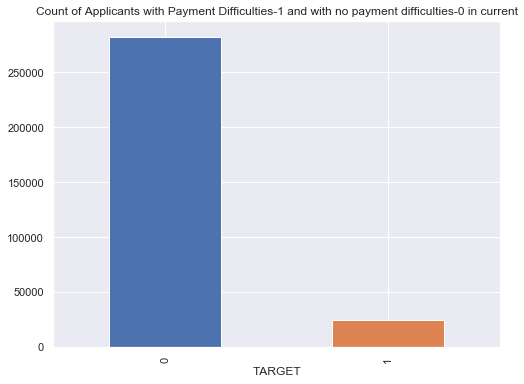

In [74]:
appdf.groupby("TARGET")["SK_ID_CURR"].count().plot(kind="bar", figsize=[8,6], title= "Count of Applicants with Payment Difficulties-1 and with no payment difficulties-0 in current" )

* #### VISUALIZATION OF DATA IMBALANCE FOR ALL THE CATEGORICAL FEATURES OF appdf- SEGMENTED UNIVARIATE ANALYSIS 

In [75]:
@interact
def seg_univar(cat_imb=catappdf.columns):
    sns.countplot(x=cat_imb, hue='TARGET', data=appdf,palette="husl")
    plt.xlabel(cat_imb)
    plt.ylabel('Total count')
    plt.legend(loc='upper center', bbox_to_anchor=(1, 0.8), ncol=1)
    plt.xticks(rotation=30, horizontalalignment='right',fontweight='light')
    return print(pd.concat([appdf.groupby("TARGET")[cat_imb].value_counts(),
                      round(appdf.groupby("TARGET")[cat_imb].value_counts(normalize=True),2)], axis=1, keys=['counts', '%age']), plt.show())

interactive(children=(Dropdown(description='cat_imb', options=('NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_…

In [76]:
# PERCENTAGE OF DEFAULTERS(TARGET=1) IN CASH LOANS
print(round(((23221/278232)*100),2))
# PERCENTAGE OF DEFAULTERS(TARGET=1) IN REVOLVING LOANS
print(round(((1604 /29279)*100),2))

8.35
5.48


*Checking data imbalance for RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED qhichwere dropped from prevappdf and a  separate dataframe was created*

In [77]:
ratedf.groupby("TARGET").count()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_PREV,WEEKDAY_APPR_PROCESS_START_PREV,HOUR_APPR_PROCESS_START_PREV,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_PREV,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,NAME_CONTRACT_TYPE_CURR,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_CURR,AMT_ANNUITY_CURR,AMT_GOODS_PRICE_CURR,NAME_TYPE_SUITE_CURR,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_CURR,HOUR_APPR_PROCESS_START_CURR,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4401,4401,4401,4400,4401,4401,4398,4401,4401,4401,4401,4401,4398,4401,4401,4401,4401,4401,4401,4401,86,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4132,4132,4132,4132,4132,4132,4401,4401,4401,4401,4401,4401,4401,4401,4399,4391,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,3477,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4395,3675,4377,4377,4377,4377,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,4401,3905,3905,3905,3905,3905,3905
1,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,8,390,390,390,390,390,390,390,390,390,390,355,355,355,355,355,355,390,390,390,390,390,390,390,390,389,388,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,321,390,390,390,390,390,390,390,390,390,390,390,390,390,324,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,390,336,336,336,336,336,336


In [78]:
# Imbalance ratio of 0 to 1 is :
4401/390

11.284615384615385

### 3.2 PREVIOUS APPLICATION DATASET - prevdf -  imbalance check - by using prev_app_df that contains TARGET


As we don't have the target variable in prevdf, thus making use of joined dataframe,prev_app_df, for checking imbalance in prevdf

In [79]:
prevapp1=prev_app_df[prev_app_df["TARGET"]==1]
print("No. of datapoints of defaulters i.e. TARGET as 1, in joined previous and application datasets:\n\n",prevapp1[["SK_ID_PREV","SK_ID_CURR"]].count())
prevapp0=prev_app_df[prev_app_df["TARGET"]==0]
print("No. of datapoints of repayers with no payment difficulties i.e. TARGET as 0, in joined previous and application datasets:\n\n",prevapp0[["SK_ID_PREV","SK_ID_CURR"]].count())

No. of datapoints of defaulters i.e. TARGET as 1, in joined previous and application datasets:

 SK_ID_PREV    122360
SK_ID_CURR    123340
dtype: int64
No. of datapoints of repayers with no payment difficulties i.e. TARGET as 0, in joined previous and application datasets:

 SK_ID_PREV    1291341
SK_ID_CURR    1306815
dtype: int64


In [80]:
  122360/1413701

0.08655295568157623

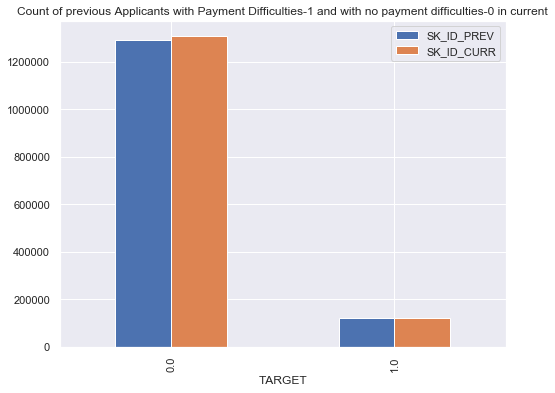

In [81]:
prev_app_df.groupby("TARGET")[["SK_ID_PREV","SK_ID_CURR"]].count().plot(kind="bar",title= "Count of previous Applicants with Payment Difficulties-1 and with no payment difficulties-0 in current", figsize=[8,6])

In [82]:
@interact
def seg_univ(cat_imb=cat_prev_app.columns):
    sns.countplot(x=cat_imb, hue='TARGET', data=prev_app_df,log=True, palette="Set1")
    plt.xlabel(cat_imb)
    plt.ylabel('Total count')
    plt.legend(loc='upper center', bbox_to_anchor=(1, 0.8), ncol=1)
    plt.xticks(rotation=30, horizontalalignment='right',fontweight='light')
    return print(plt.show(), pd.concat([prev_app_df.groupby("TARGET")[cat_imb].value_counts(),round(prev_app_df.groupby("TARGET")[cat_imb].value_counts(normalize=True),2)], axis=1, keys=['counts', '%age']))

interactive(children=(Dropdown(description='cat_imb', options=('NAME_CONTRACT_TYPE_PREV', 'WEEKDAY_APPR_PROCES…



### Step 4. Results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

In [83]:
# Univariate analysis of each feature numeric dataframe of num_prev_app_df
@interact
def univar_all(colm=num_prev_app.iloc[:,2:].columns):
    return num_prev_app[colm].plot(kind="hist", title=colm, rot='vertical', bins=40,logy=True)

interactive(children=(Dropdown(description='colm', options=('AMT_ANNUITY_PREV', 'AMT_APPLICATION', 'AMT_CREDIT…

#### 4.1. Segmented univariate analysis of numeric variables on TARGET 0 and 1 - appdf

* #### 4.1.1. segmented univariate for 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'

In [84]:
@interact
def valuecount(amtcols=['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'], x=(0,10000000,5000)):
    return print( numappdf.loc[numappdf[amtcols] > x][["TARGET",amtcols]].groupby(["TARGET"]).count(),"\n\n",numappdf.loc[numappdf[amtcols] >x][["SK_ID_CURR",amtcols,"TARGET"]])

interactive(children=(Dropdown(description='amtcols', options=('AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY'…

* #### 4.1.2. segmented univariate for all the variables like:-'AMT_REQ_CREDIT_BUREAU'

In [85]:
@interact
def valuecount(bureaucols=numappdf.filter(regex='BUREAU').columns, x=(0,6,1)):
    return print( numappdf.loc[numappdf[bureaucols] == x][["TARGET",bureaucols]].groupby(["TARGET"]).count(),"\n\n",numappdf.loc[numappdf[bureaucols] == x][["SK_ID_CURR",bureaucols,"TARGET"]])

interactive(children=(Dropdown(description='bureaucols', options=('AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDI…

* #### 4.1.3. segmented univariate for all the FLAG variables in numappdf

In [86]:
@interact
def valuecount(flagcol=numappdf.filter(like='FLAG').columns, x=(0,1.0,1)):
    return print( numappdf.loc[numappdf[flagcol] == x][["TARGET",flagcol]].groupby(["TARGET"]).count(),"\n\n",numappdf.loc[numappdf[flagcol] == x][["SK_ID_CURR","TARGET",flagcol]])

interactive(children=(Dropdown(description='flagcol', options=('FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHON…

* #### 4.1.4. segmented univariate for the normalised - external source in numappdf

In [87]:
@interact
def valuecount(bldgcols=numappdf.filter(regex='EXT').columns, x=(0,1,0.1)):
    return print( "The UNIVARIATE ANALYSIS of each normalised information about building features of applicant SEGMENTED on TARGET variable is as follows:\n\n"
                 ,numappdf.loc[numappdf[bldgcols] <= x][["TARGET",bldgcols]].groupby(["TARGET"]).count(),"\n\n",numappdf.loc[numappdf[bldgcols] <= x][["SK_ID_CURR","TARGET",bldgcols]])

interactive(children=(Dropdown(description='bldgcols', options=('EXT_SOURCE_2', 'EXT_SOURCE_3'), value='EXT_SO…

* #### 4.1.5. Segmented Univariate analysis of all the variable application data

appdf_target1- Univariate for all the variables for target 1, those with payment difficulties

In [88]:

@interact
def grpby(grouppbycol=appdf_target1.iloc[:,1:].columns):
    return print("The number of records in this category:","\n", appdf_target1.groupby(grouppbycol).count()["SK_ID_CURR"])

interactive(children=(Dropdown(description='grouppbycol', options=('TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDE…

appdf_target0- Univariate for all the variables for target 0, those without any payment difficulties

In [89]:

@interact
def grpby(grouppbycol=appdf_target0.iloc[:,1:].columns):
    return print("The number of records in this category:","\n", appdf_target0.groupby(grouppbycol).count()["SK_ID_CURR"])

interactive(children=(Dropdown(description='grouppbycol', options=('TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDE…

#### 4.2. Segmented univariate analysis of numeric variables - prevdf by using prev_app_df

prevapp1- Univariate for all the variables for target 1, those with payment difficulties

In [90]:

@interact
def grpby(grouppbycol=prevapp1.iloc[:,2:].columns):
    return print("The number of records in this category:","\n", prevapp1.groupby(grouppbycol).count()["SK_ID_CURR"])

interactive(children=(Dropdown(description='grouppbycol', options=('NAME_CONTRACT_TYPE_PREV', 'AMT_ANNUITY_PRE…

prevapp0- Univariate for all the variables for target 0, those without any payment difficulties

In [91]:

@interact
def grpby(grouppbycol=prevapp0.iloc[:,2:].columns):
    return print("The number of records in this category:","\n", prevapp0.groupby(grouppbycol).count()["SK_ID_CURR"])

interactive(children=(Dropdown(description='grouppbycol', options=('NAME_CONTRACT_TYPE_PREV', 'AMT_ANNUITY_PRE…

#### 4.3. Bivariate analysis of numeric variables - appdf for Target 0 and 1

appdf_target1- bivariate of all the numeric variables for target 1

In [92]:
num_appdf1=appdf_target1[list(appdf_target1.select_dtypes(numerics).columns)]

appdf_target0- bivariate of all the numeric variables for target 0

In [93]:
num_appdf0=appdf_target0[list(appdf_target0.select_dtypes(numerics).columns)]

In [94]:
@interact
def scatter_plot(x=numappdf.iloc[:,2:].columns, 
                 y=numappdf.iloc[:,3:].columns):
    return  numappdf.plot(kind='scatter', x=x, y=y, rot="vertical") 

interactive(children=(Dropdown(description='x', options=('CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AM…

#### 4.4. Bivariate analysis of numeric variables(numprevapp) - prevapp0 for TARGET 0 and prevapp1 for TARGET 1 segmented from prev_app_df 

### *prevapp1 numeric variables - correlation of numeric variable which have only target 1*

In [95]:
num_prevappdf1=prevapp1[list(prevapp1.select_dtypes(numerics).columns)]

In [96]:
@interact
def scatter_plot(x=num_prevappdf1.iloc[:,2:].columns, 
                 y=num_prevappdf1.iloc[:,3:].columns):
    return  num_prevappdf1.plot(kind='scatter', x=x, y=y, rot="vertical") 

interactive(children=(Dropdown(description='x', options=('AMT_ANNUITY_PREV', 'AMT_APPLICATION', 'AMT_CREDIT_PR…

### *#prevapp0 numeric variables - correlation of numeric variable which have only target 0*


In [97]:
num_prevappdf0=prevapp0[list(prevapp0.select_dtypes(numerics).columns)]

In [98]:
@interact
def scatter_plot(x=num_prevappdf0.iloc[:,2:].columns, 
                 y=num_prevappdf0.iloc[:,3:].columns):
    return  num_prevappdf0.plot(kind='scatter', x=x, y=y, rot="vertical") 

interactive(children=(Dropdown(description='x', options=('AMT_ANNUITY_PREV', 'AMT_APPLICATION', 'AMT_CREDIT_PR…

### *#num_prev_app numeric variables - merged app and prev data with all target 0 and 1 together*


In [99]:

@interact
def scatter_plot(x=num_prev_app.iloc[:,2:].columns, 
                 y=num_prev_app.iloc[:,3:].columns):
    return  num_prev_app.plot(kind='scatter', x=x, y=y, rot="vertical") 

interactive(children=(Dropdown(description='x', options=('AMT_ANNUITY_PREV', 'AMT_APPLICATION', 'AMT_CREDIT_PR…

#### *4.5. Bivariate analysis of categoric variables - appdf for Target 0 and 1 (could be run if needed, butnot required as of now)*

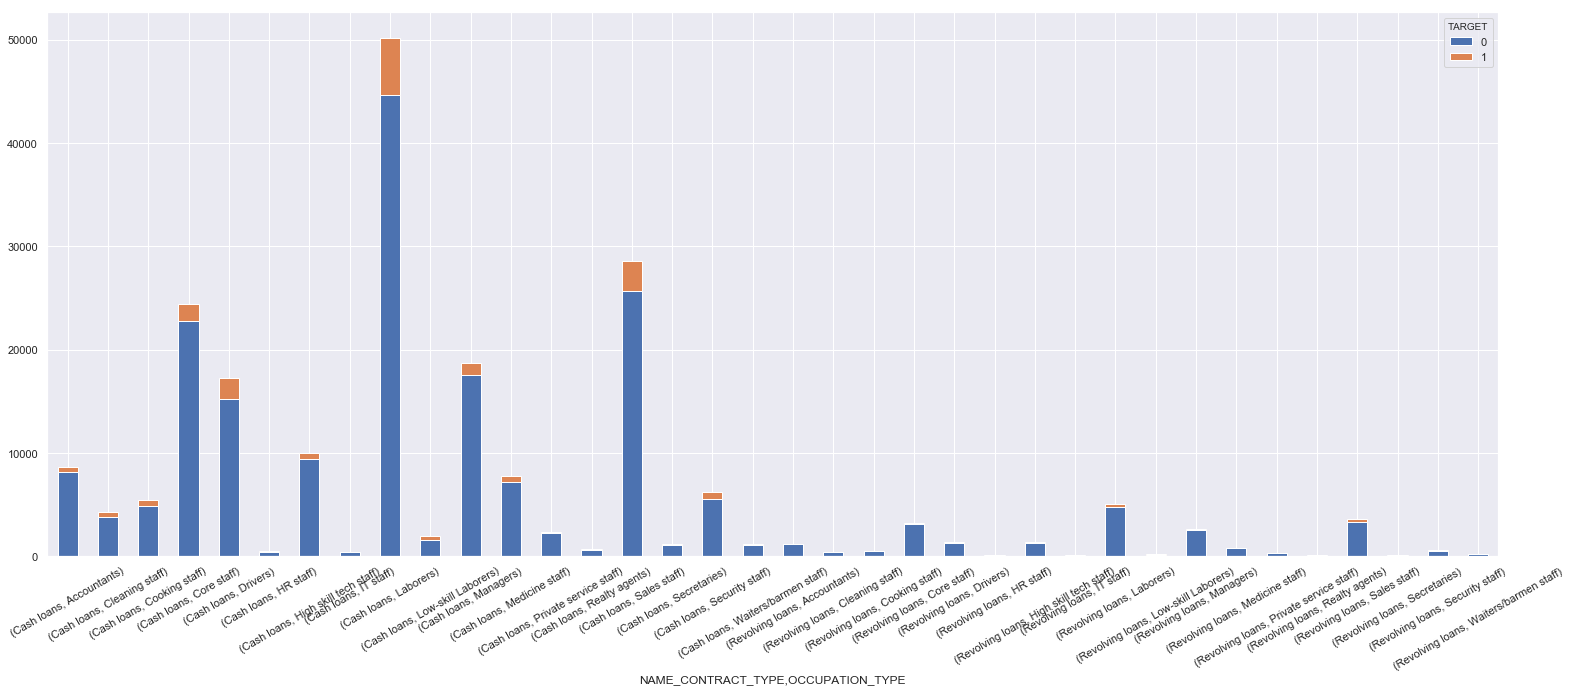

In [106]:
appdf.groupby(['NAME_CONTRACT_TYPE','OCCUPATION_TYPE','TARGET'])['NAME_CONTRACT_TYPE'].count().unstack().plot(kind="bar", stacked=True,figsize=[26,10],rot=30)

TARGET                                 0        1
NAME_CONTRACT_TYPE CODE_GENDER                   
Cash loans         F            169673.0  13127.0
                   M            85338.0   10094.0
Revolving loans    F            18605.0   1043.0 
                   M            9065.0    561.0  
                   XNA          4.0      NaN     
TARGET                                0      1
NAME_CONTRACT_TYPE FLAG_OWN_CAR               
Cash loans         N             167661  16114
                   Y             87350   7107 
Revolving loans    N             18013   1135 
                   Y             9661    469  
TARGET                                   0      1
NAME_CONTRACT_TYPE FLAG_OWN_REALTY               
Cash loans         N                80505   7520 
                   Y                174506  15701
Revolving loans    N                5852    322  
                   Y                21822   1282 
TARGET                                   0      1
NAME_CONTRACT_TYPE

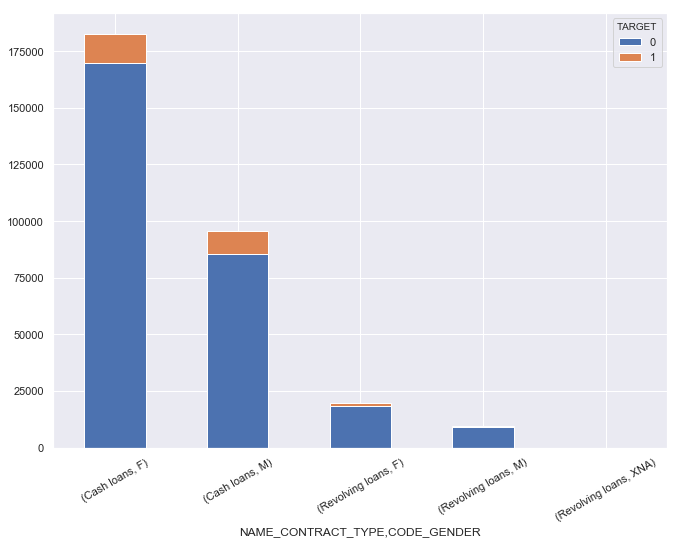

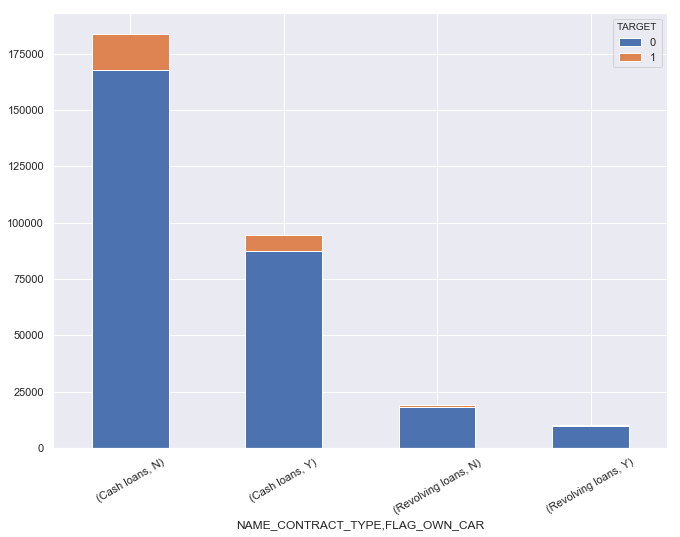

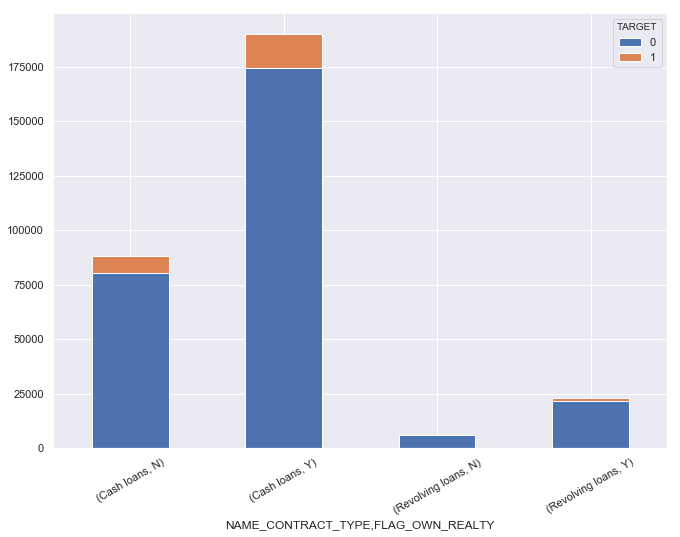

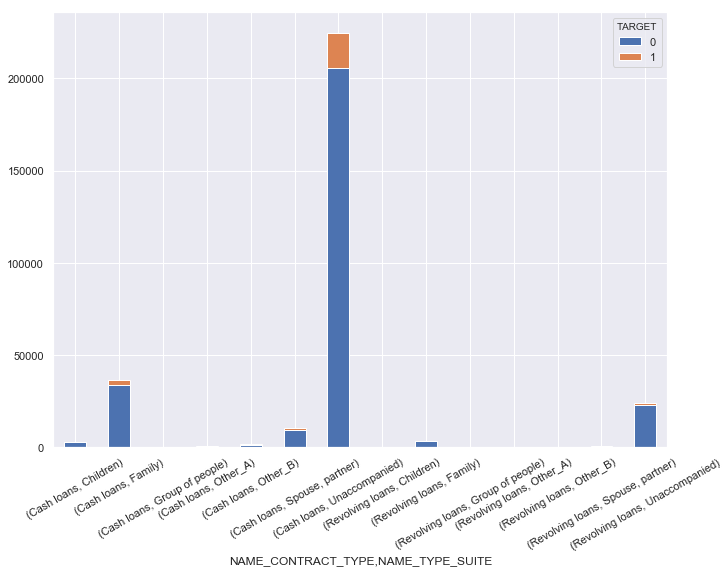

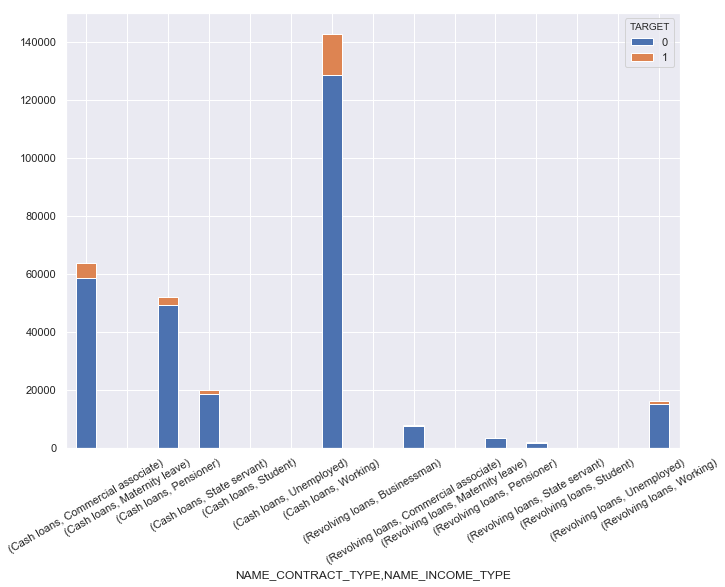

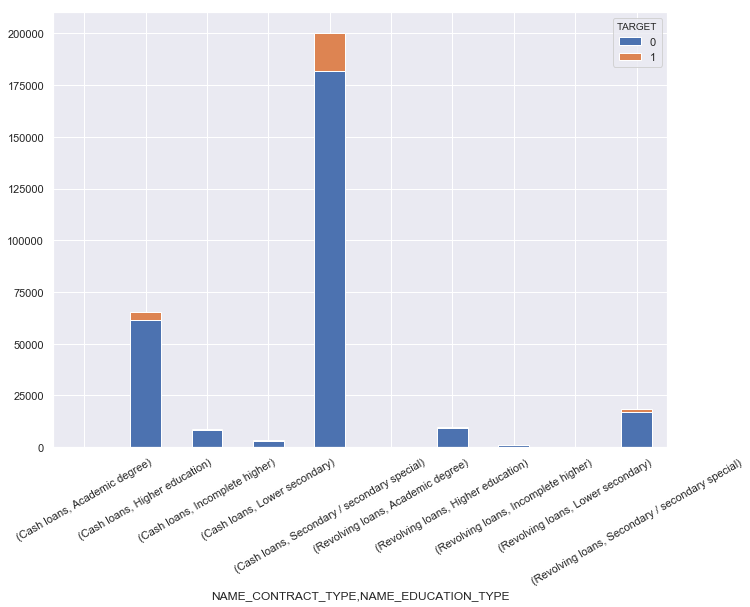

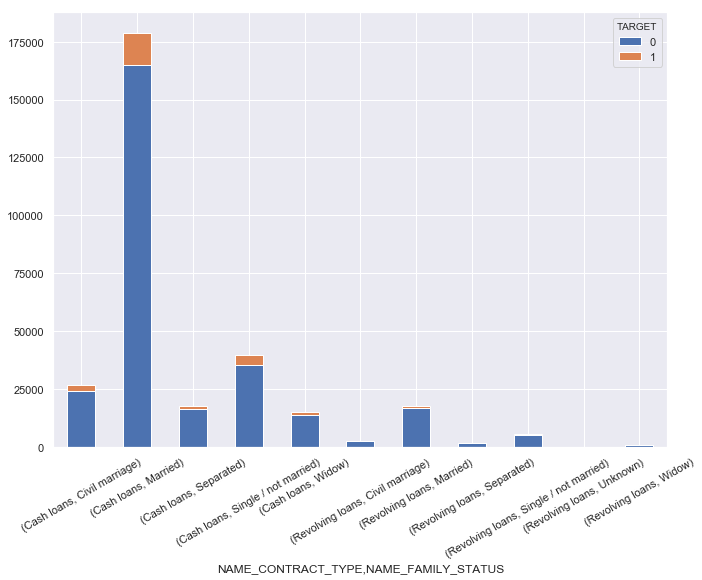

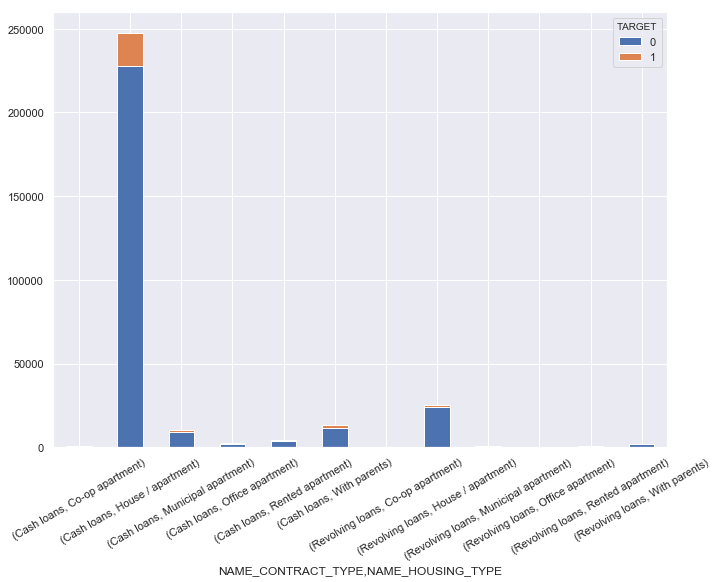

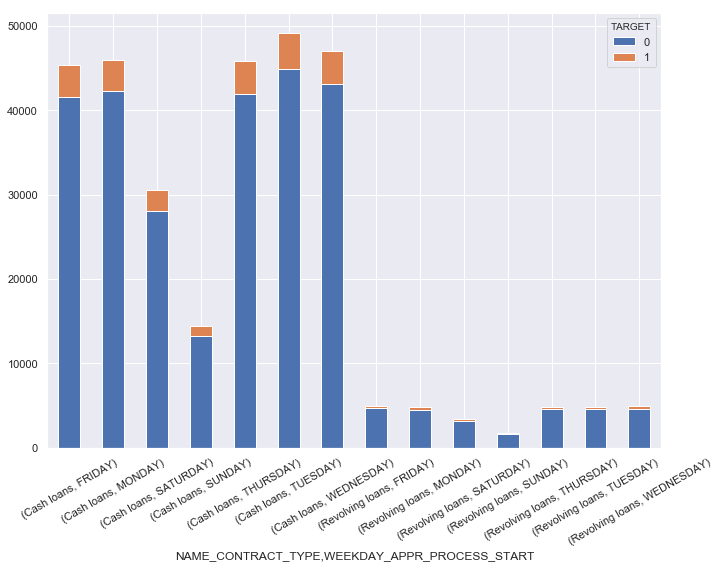

In [108]:
catbivcols=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'WEEKDAY_APPR_PROCESS_START']
for i in catbivcols:
    appdf.groupby(['NAME_CONTRACT_TYPE',i,'TARGET'])['NAME_CONTRACT_TYPE'].count().unstack().plot(kind="bar", stacked=True,figsize=[11,8],rot=30)
    print(appdf.groupby(['NAME_CONTRACT_TYPE',i,'TARGET'])['NAME_CONTRACT_TYPE'].count().unstack())

### Step 5. CORRELATION
##### Top 10 correlation  for the Client with payment difficulties and all other cases (Target variable). 


#### 5.1. numeric variables - app data -TARGET 1 -correlation

In [101]:
# CHECKING THE CORRELATION OF ALL THESE VARIABLES
num_appdf1[['CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 
       'CNT_FAM_MEMBERS','HOUR_APPR_PROCESS_START',
       'DAYS_LAST_PHONE_CHANGE', 
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].corr(method ='kendall')

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.003862,0.000185,0.026474,-0.006026,-0.025150,0.210293,-0.092415,0.105704,-0.021441,0.786340,-0.018372,0.010182,0.000543,-0.010595,-0.004346,-0.012738,-0.014437,-0.031236
AMT_INCOME_TOTAL,-0.003862,1.000000,0.252591,0.305127,0.259804,0.035758,-0.006055,-0.081925,0.025152,-0.004142,0.003043,0.063037,-0.056336,0.008951,-0.001990,0.015808,0.066091,0.020576,0.060967
AMT_CREDIT,0.000185,0.252591,1.000000,0.621455,0.890277,0.027080,-0.105474,-0.056622,-0.011370,-0.036143,0.051154,0.019842,-0.066705,0.002413,-0.003998,0.002451,0.036216,-0.015267,-0.019221
AMT_ANNUITY,0.026474,0.305127,0.621455,1.000000,0.619788,0.015741,-0.020584,-0.064951,0.023960,-0.009598,0.067243,0.022207,-0.050050,0.011758,-0.003630,0.024664,0.052742,-0.002730,-0.003771
AMT_GOODS_PRICE,-0.006026,0.259804,0.890277,0.619788,1.000000,0.037277,-0.109129,-0.059483,-0.013005,-0.040808,0.049809,0.028261,-0.076119,0.005125,-0.004173,0.003052,0.039518,-0.013068,-0.019383
REGION_POPULATION_RELATIVE,-0.025150,0.035758,0.027080,0.015741,0.037277,1.000000,-0.031269,-0.002431,-0.023117,-0.015999,-0.017417,0.076256,-0.028066,-0.004790,0.000673,-0.001805,0.040464,-0.011899,0.006313
DAYS_BIRTH,0.210293,-0.006055,-0.105474,-0.020584,-0.109129,-0.031269,1.000000,-0.056786,0.161878,0.207409,0.137159,0.045644,0.067988,0.012984,0.001041,-0.002718,0.004257,-0.008583,-0.058705
DAYS_EMPLOYED,-0.092415,-0.081925,-0.056622,-0.064951,-0.059483,-0.002431,-0.056786,1.000000,-0.010835,-0.032423,-0.109085,-0.019019,0.103128,0.003000,0.016185,0.009560,-0.023836,0.013631,-0.020566
DAYS_REGISTRATION,0.105704,0.025152,-0.011370,0.023960,-0.013005,-0.023117,0.161878,-0.010835,1.000000,0.065558,0.096388,-0.022156,0.039378,-0.001600,-0.002512,0.003408,0.011050,-0.005730,-0.007653
DAYS_ID_PUBLISH,-0.021441,-0.004142,-0.036143,-0.009598,-0.040808,-0.015999,0.207409,-0.032423,0.065558,1.000000,-0.022112,0.018349,0.069997,0.002232,-0.010900,0.002923,-0.007692,0.006719,-0.032420


In [102]:
# SELECTING ONLY THESE AFTER CHECKING HIGHEST CORRELATION
num_appdf1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]].corr(method ='kendall') 

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
AMT_INCOME_TOTAL,1.000000,0.252591,0.305127,0.259804
AMT_CREDIT,0.252591,1.000000,0.621455,0.890277
AMT_ANNUITY,0.305127,0.621455,1.000000,0.619788
AMT_GOODS_PRICE,0.259804,0.890277,0.619788,1.000000


#### 5.2. numeric variables - app data -TARGET 0 -correlation

In [103]:
num_appdf0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]].corr(method ='kendall') 

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
AMT_INCOME_TOTAL,1.000000,0.293500,0.345668,0.299927
AMT_CREDIT,0.293500,1.000000,0.643220,0.912519
AMT_ANNUITY,0.345668,0.643220,1.000000,0.644608
AMT_GOODS_PRICE,0.299927,0.912519,0.644608,1.000000


#### 5.3. numeric variables - prev_app_df -TARGET 0 -correlation

In [104]:
num_prevappdf0[['AMT_ANNUITY_PREV', 'AMT_APPLICATION',
       'AMT_CREDIT_PREV', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_PREV', 'CNT_PAYMENT']].corr(method ='kendall') 

,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_PREV,CNT_PAYMENT
AMT_ANNUITY_PREV,1.000000,0.661746,0.696824,0.054112,0.711495,0.278570
AMT_APPLICATION,0.661746,1.000000,0.878768,0.065290,0.999831,0.505098
AMT_CREDIT_PREV,0.696824,0.878768,1.000000,-0.029414,0.926795,0.421920
AMT_DOWN_PAYMENT,0.054112,0.065290,-0.029414,1.000000,0.065290,-0.173328
AMT_GOODS_PRICE_PREV,0.711495,0.999831,0.926795,0.065290,1.000000,0.464052
CNT_PAYMENT,0.278570,0.505098,0.421920,-0.173328,0.464052,1.000000


#### 5.4. numeric variables - prev_app_df -TARGET 1 -correlation

In [105]:
num_prevappdf1[['AMT_ANNUITY_PREV', 'AMT_APPLICATION',
       'AMT_CREDIT_PREV', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_PREV', 'CNT_PAYMENT']].corr(method ='kendall') 

,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_PREV,CNT_PAYMENT
AMT_ANNUITY_PREV,1.000000,0.664026,0.709291,0.034152,0.717099,0.337717
AMT_APPLICATION,0.664026,1.000000,0.889872,0.038578,0.999731,0.520693
AMT_CREDIT_PREV,0.709291,0.889872,1.000000,-0.048618,0.932280,0.444139
AMT_DOWN_PAYMENT,0.034152,0.038578,-0.048618,1.000000,0.038578,-0.156504
AMT_GOODS_PRICE_PREV,0.717099,0.999731,0.932280,0.038578,1.000000,0.483941
CNT_PAYMENT,0.337717,0.520693,0.444139,-0.156504,0.483941,1.000000


### top 3 correlations of appdf TARGET 0:
1. AMT_GOODS_PRICE and AMT_CREDIT     : 0.912
2. AMT_ANNUITY  and AMT_CREDIT        : 0.643
3. AMT_ANNUITY and AMT_INCOME_TOTAL   : 0.345
### top 3 correlations of appdf TARGET 1:
1. AMT_GOODS_PRICE and AMT_CREDIT     : 0.890
2. AMT_ANNUITY  and AMT_CREDIT        : 0.621
3. AMT_ANNUITY and AMT_INCOME_TOTAL   : 0.305
### top 3 correlations of prev_app_df TARGET 0
1. AMT_APPLICATION  and AMT_GOODS_PRICE_PREV : 0.999
2. AMT_GOODS_PRICE_PREV and AMT_CREDIT_PREV  : 0.932
3. AMT_CREDIT_PREV and AMT_APPLICATION       : 0.878

### top 3 correlations of prev_app_df TARGET 1
1. AMT_APPLICATION  and AMT_GOODS_PRICE_PREV : 0.999
2. AMT_GOODS_PRICE_PREV and AMT_CREDIT_PREV  : 0.932
3. AMT_CREDIT_PREV and AMT_APPLICATION       : 0.889




## Results of univariate, segmented univariate, bivariate analysis, etc. in business terms.